[[3933191.             +0.j           -5768.95029757-244817.41894185j
     8066.77347532 +81273.27897458j ...  149750.26805098 -69046.54746366j
     8066.77347532 -81273.27897458j   -5768.95029757+244817.41894185j]
 [-795438.2370427 -529894.44181842j   49394.24878864 -37275.42781681j
    44491.18027284+134368.20298682j ... -154380.29184822-100219.84114861j
  -131066.64971039 -26253.62841206j   71055.67773373-181520.52910225j]
 [-210599.03364604+223274.41936293j -188110.50482961+129492.81135878j
    99761.59799516-160731.03977714j ...    6687.72447128+115184.8664966j
   -66964.99545909+234918.12758491j  -69926.13307521+219442.6107878j ]
 ...
 [  56640.34212569-299940.28776323j  131905.64305711+247850.28272803j
   254723.02106453 -16296.45071825j ...  -17369.61465833 -11339.4556107j
   -78343.29759493 -55602.20262443j -109113.90248004 -96764.69932712j]
 [-210599.03364604-223274.41936293j  -69926.13307521-219442.6107878j
   -66964.99545909-234918.12758491j ...  -99419.44251517 +47934.8975

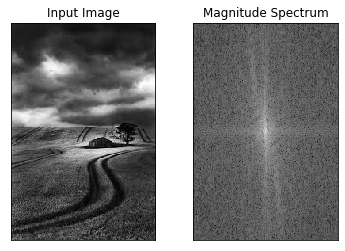

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('download.jpg',0)

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
# shift the zero-frequncy component to the center of the spectrum
dft_shift = np.fft.fftshift(dft)
img = cv2.imread('download.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
print(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))
print(magnitude_spectrum)

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'High pass filter'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

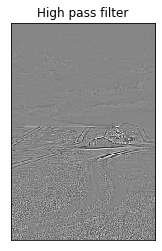

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
import PIL
#from google.colab import Image

def plot(data, title):
    plot.i += 1
    plt.subplot(2,2,plot.i)
    plt.imshow(data)
    plt.gray()
    plt.title(title)


plot.i = 0
data = np.array(img, dtype=float)
plot(data, 'Original')
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])
highpass_3x3 = ndimage.convolve(data, kernel)
plt.subplot(121),plt.imshow(highpass_3x3, cmap = 'gray')
plt.title('High pass filter'), plt.xticks([]), plt.yticks([])



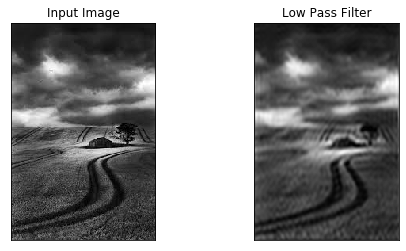

In [0]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
# plot both images
plt.figure(figsize=(8,4))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Low Pass Filter'), plt.xticks([]), plt.yticks([])
plt.show()